In [1]:
import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator
from cycler import cycler
import yaml
from scipy.interpolate import interp1d

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
cm = 1/2.54

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
materials = ['a-Si', 'c-Si', 'CdTe', 'CIGS', 'GaAs', 'MAPI']
abs_coefs={}
for material in materials:
    abs_coefs[material]=pd.read_excel('./data/abs_coef_'+material+'.xlsx')
    abs_coefs[material]=abs_coefs[material].set_index('Wavelength (nm)')

(0.0, 1.0, 0.0, 1.0)

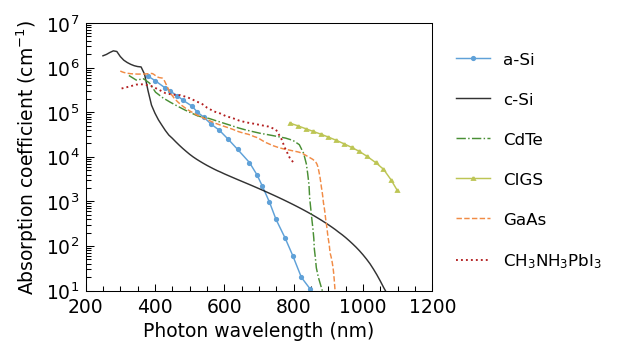

In [8]:
fig = plt.figure(figsize=(10*cm, 6*cm), dpi=DPI_PLOT)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.2])

ax0 = fig.add_subplot(gs[0])
ax0.plot(abs_coefs['a-Si'], '-o', ms=1.5, c=colors['color1'], label='a-Si')
ax0.plot(abs_coefs['c-Si'], c=colors['color11'], label='c-Si', alpha=0.8)
ax0.plot(abs_coefs['CdTe'], '-.', ms=1.5, c=colors['color3'], label='CdTe')
ax0.plot(abs_coefs['CIGS'], '-^', ms=1.3, c=colors['color8'], label='CIGS')
ax0.plot(abs_coefs['GaAs'], '--', ms=0.5, c=colors['color5'], label='GaAs')
ax0.plot(abs_coefs['MAPI'], ':', lw=0.9, c=colors['color2'], label=r'CH$_3$NH$_3$PbI$_3$')

ax0.set_yscale('log')
ax0.set_ylim(10, 1e7)
ax0.set_xlim(200, 1200)
ax0.set_xlabel('Photon wavelength (nm)')
ax0.set_ylabel(r'Absorption coefficient (cm$^{-1}$)')
ax0.xaxis.set_minor_locator(AutoMinorLocator(4))
ax0.yaxis.set_major_locator(LogLocator(base=10, numticks=8))
ax0.yaxis.set_minor_locator(LogLocator(base=10, subs=np.linspace(0.2,0.9,8), numticks=8))

ax0.legend(loc=[1.05,0.05],labelspacing = 1.5)

ax1 = fig.add_subplot(gs[1])
ax1.axis('off')

#fig.savefig('abs_coefs_various.png', dpi=DPI_SAVE, bbox_inches='tight')